# Files Exercises
## Question 1: Counting Amino Acids



In last week's worksheet you wrote a Python script which converted a RNA sequence into a protein by performing the translation (RNA -> amino acid sequence) process. In this question you will extend the script to:
1. Read a DNA sequence from a `fasta` file
1. Transcribe the sequence (convert from DNA to RNA) by replacing all occurrences of "T" with "U".
1. Translate the sequence (**already done last week**)
1. Count the frequency of each amino acid and plot it as a histogram

<img src="aa_freq.png" alt="Amino Acid Frequencies" width="300"/>

### Step 1
Write a script which opens the file `random_60.fasta` and reads the DNA sequence into a string variable. Make sure you discard the line beginning '`>`' and remove newline characters.
### Step 2
Convert the DNA sequence to an RNA sequence using `string.replace` to replace each occurrence of `T` with `U`. (e.g. "CTGCTC" should become "CUGCUC").
### Step 3
Translate the RNA sequence to a protein by generating a string variable containing the amino acid sequence (you can reuse last week's code).
### Step 4
Write a script which creates a list which contains the number of occurrences of each amino acid in the protein. Plot a histogram showing the frequency of each amino acid. Add y-axis label 'Frequency' and x-axis label 'Amino acid'.



['G', 'S', 'S', 'R', 'T', 'R', 'L', 'H', 'Q', 'D', 'S', 'R', 'G', 'A', 'P']
['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '!']
True
[1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 3, 3, 1, 0, 0, 0, 0]


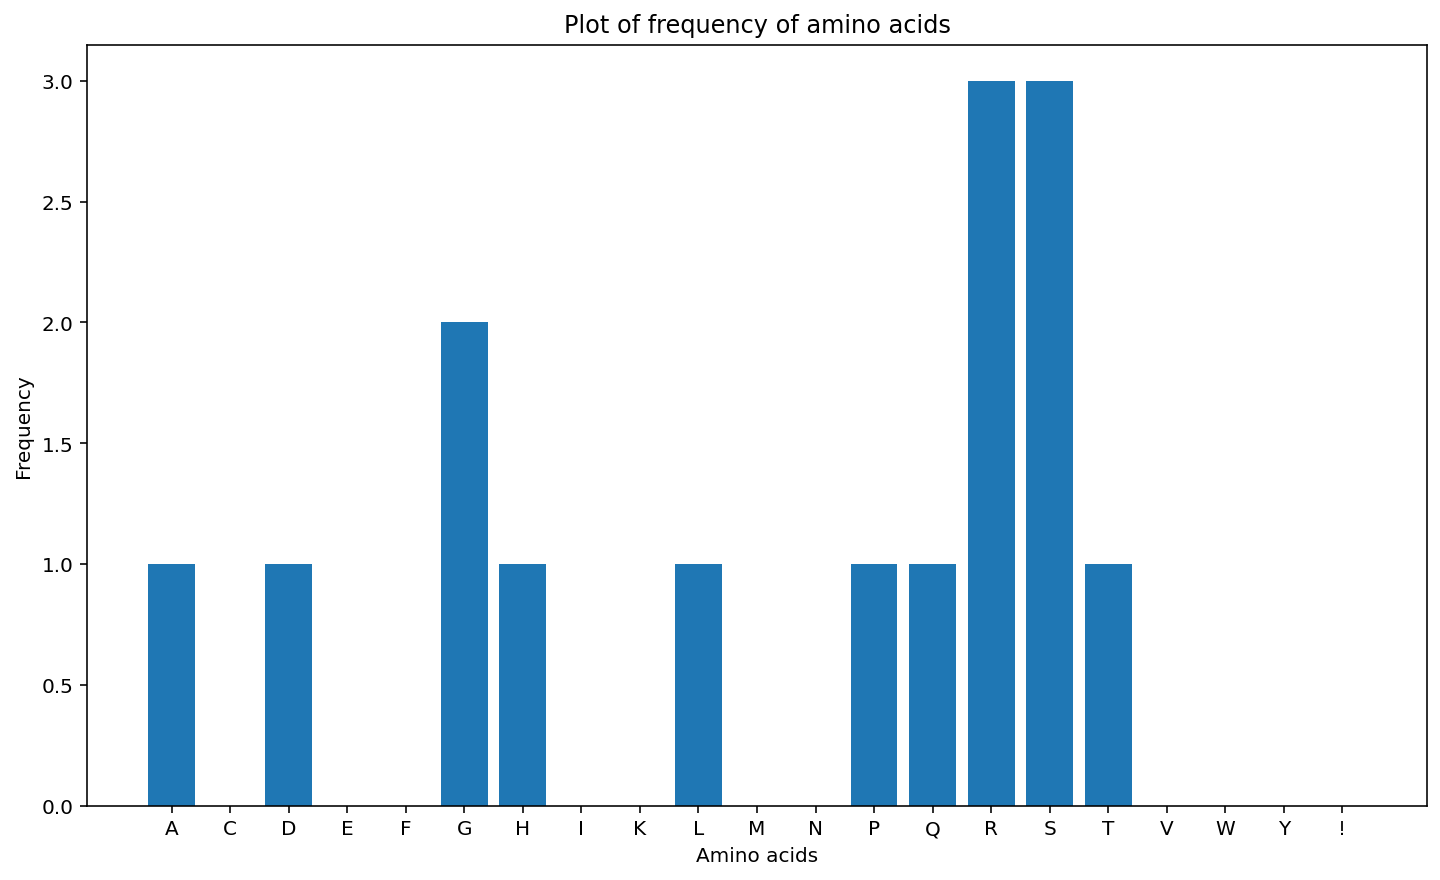

In [12]:
#step 1
stop_codon = ["UAA","UAG","UGA"]
genetic_code = ['GCA', 'GCC', 'GCG', 'GCU', 'UGC', 'UGU', 'GAC', 'GAU', 'GAA',
                'GAG', 'UUC', 'UUU', 'GGA', 'GGC', 'GGG', 'GGU', 'CAC', 'CAU',
                'AUA', 'AUC', 'AUU', 'AAA', 'AAG', 'UUA', 'UUG', 'CUA', 'CUC',
                'CUG', 'CUU', 'AUG', 'AAC', 'AAU', 'CCA', 'CCC', 'CCG', 'CCU',
                'CAA', 'CAG', 'AGA', 'AGG', 'CGA', 'CGC', 'CGU', 'CGG', 'AGC',
                'AGU', 'UCA', 'UCC', 'UCG', 'UCU', 'ACA', 'ACC', 'ACG', 'ACU',
                'GUA', 'GUC', 'GUG', 'GUU', 'UGG', 'UAC', 'UAU', 'UAG', 'UAA','UGA']
amino_acid = ['A', 'A', 'A', 'A', 'C', 'C', 'D', 'D', 'E', 'E', 'F', 'F',
               'G', 'G', 'G', 'G', 'H', 'H', 'I', 'I', 'I', 'K', 'K', 'L',
               'L', 'L', 'L', 'L', 'L', 'M', 'N', 'N', 'P', 'P', 'P', 'P',
               'Q', 'Q', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'S', 'S', 'S',
               'S', 'S', 'T', 'T', 'T', 'T', 'V', 'V', 'V', 'V', 'W', 'Y',
               'Y', '!', '!', '!']
def DNA_seq(file):
    dna =[]
    with open(file) as f:
        next(f)
        for c in f:
            return c

#step 2
def DNA_to_RNA(file):
    dna_seq = DNA_seq(file)
    rna = dna_seq.replace("T","U")
    return rna
#step 3

def startcodon_pos(sequence):
    for i in range(len(sequence)):
        if sequence[i:i+3] == "AUG":
            return i

#step 2
def print_codon(sequence):
    codon = []
    j = int(startcodon_pos(sequence))
    for k in range(j+3,len(sequence),3):
        elem = sequence[k:k+3]
        if elem not in stop_codon:
            codon.append(elem)
        else:
            break
    return codon

#step 3
def test_length(genetic_code, amino_acids):
    assert(len(genetic_code) == len(amino_acids)), "Lengths do not match"
    return True

def translate(sequence,genetic_code, amino_acids):
    if test_length(genetic_code, amino_acids) == True:
        acid_list = []
        codon_list = print_codon(sequence)
        for c in codon_list:
            if c in genetic_code:
                #getting index of the codon
                codonidx = genetic_code.index(c)
                acid_list.append(amino_acid[codonidx])
    return acid_list
file = "Simple_gene_new.fasta"
# """"
# debugging/testing
# # print(DNA_seq(file))
# # print(DNA_to_RNA(file))
# # print(startcodon_pos(DNA_to_RNA(file)))
# """"
print(translate(DNA_to_RNA(file),genetic_code, amino_acid))
#step 4
import matplotlib.pyplot as plt

def acid_list():
    acid_list = []
    for item in amino_acid:
        if item not in acid_list:
            acid_list.append(item)
    return acid_list

def count_amino(sequence, genetic_code, amino_acids):
    a_list = acid_list()
    translated_code = translate(DNA_to_RNA(file),genetic_code, amino_acid)
    count_dict = {}
    count_list = []
    for item in translated_code:
        if item in count_dict:
            count_dict[item] += 1
        else:
            count_dict[item] = 1
    sorted_count = sorted(count_dict)
    for dude in a_list:
        if dude not in count_dict:
            count_list.append(0)
        else:
            count_list.append(count_dict[dude])
    return count_list

def check_length(sequence, genetic_code, amino_acids):
    amino_list = count_amino(sequence, genetic_code, amino_acids)
    a_list = acid_list()
    assert(len(a_list) == len(amino_list)), "Lengths do not match"
    return True


def plot(sequence,genetic_code,amino_acids):
    y_list = count_amino(sequence,genetic_code, amino_acids)
    x_list = acid_list()
    plt.bar(x_list, y_list)
    plt.ylabel("Frequency")
    plt.xlabel("Amino acids")
    plt.title("Plot of frequency of amino acids")


seq = DNA_to_RNA(file)
print(acid_list())
print(check_length(seq, genetic_code, amino_acid))
print(count_amino(DNA_to_RNA(file),genetic_code, amino_acid))
plot(seq, genetic_code, amino_acid)
plt.show()

## Question 2: Star Map

In this question you will use data from a star catalogue to create a picture that plots the locations of stars, like this:

<img src="star_map.png" alt="Star Map" width="300"/>

The file `stars.csv` contains one line for each star that is represented in the catalogue. The meaning of each field (column) is described below.

- The first three fields are the x, y and z coordinates for the star. We will ignore the z coordinate, and use only the x and y coordinates. Each axis in the coordinate system goes from -1 to +1, and the centre point is 0,0.
- The fourth field is the Henry Draper number, which is simply a unique identifier for the star.
- The fifth field is the magnitude (or brightness) of the star.
- The sixth field exists only for a small number of stars and is a semicolon-separated list of names for a star. A star may have several names.
- The fields that you will need for this assignment include the x and y coordinates, the magnitude and the name of each star.

### Step 1

 - Create four empty lists `x`, `y`, `mag` and `star_name` to store the x coordinate, y coordinate, magnitude and star name of each star.
 - Open the file `stars.csv` and use `csv.reader` to load the contents into the four lists. Make sure you convert each to the appropriate data type (float or string).
 - Where there is more than one star name, store the second one (using `string.split` and `string.strip`)

### Step 2

Make a scatter plot of the x, y coordinates. Use the following code to set up your plot:

```
fig, ax = plt.subplots(figsize=(5,5))
fig.patch.set_facecolor("black") # set the figure background to black
ax.axis("off") # remove the axes
ax.set_facecolor("black") # set the plot background to black
```

Use `ax.scatter(x, y)` to plot the stars. Try to make it look similar to the image above by passing suitable values for the `marker`, `s` and `color` parameters (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html).


### Step 3

The file `Cas_lines.txt` contains two star names per line. Each pair of star names represent one line to be drawn for the constellation. Write code which iterates over each line in the file, and for each line, determines the x and y coordinates of the two stars, then draws a line between them on the plot.

The following code will plot a line between coordinates (x_1, y_1) and (x_2, y_2).
```
ax.plot([x_1, x_2], [y_1, y_2])
```

- Open the file `Cas_lines.txt` and use `csv.reader` to iterate over each row. For each row:
  - use `star_name.index` to find the index of the two star names in the list of star names you created in step 1.
  - determine the x and y coordinates of each
  - use the code above to plot a line between them.





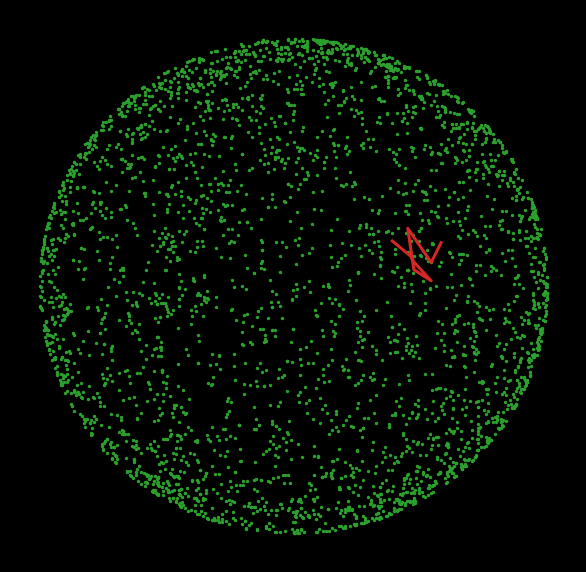

In [1]:
import csv
import matplotlib.pyplot as plt
#step 1
x =[]
y =[]
mag =[]
star_name = []
with open("stars.csv") as f:
    b = csv.reader(f)
    next(b)
    r = [i for i in b]
    x = [float(row[0]) for row in r]
    y = [float(row[1]) for row in r]
    mag = [float(row[4]) for row in r]
    star_name = [row[5].split(";")[-1].strip() for row in r]

# print(star_name)
# print(x[0:10])
# print(y[0:10])
# print(len(x),len(y),len(mag))

# step 2
fig, ax = plt.subplots(figsize=(5,5))
fig.patch.set_facecolor("black") 
ax.axis("off") 
ax.set_facecolor("black") 
ax.scatter(x,y,s=0.5,c='#2ca02c')


#step 3
with open("Cas_lines.txt") as s:
    stars_lst = []
    for row in s:
        stars_lst.append(row.replace("\n","").split(","))
#print(stars_lst)
x_coor = []
y_coor = []
for star in stars_lst:
    star1 = star[0]
    star2 = star[1]
    n1 = star_name.index(star1)
    n2 = star_name.index(star2)
    x_coor.append(x[n1])
    y_coor.append(y[n2])
# print(x_coor)
# print(y_coor)
ax.plot(x_coor, y_coor, c = '#d62728' )
plt.show()